In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Excel file
file_path = r"C:\Users\sally\Desktop\Covid19\owid-covid-data.xlsx"
df = pd.read_excel(file_path)


# Confirm it loaded successfully
print("✅ Data loaded successfully!")
print("\n🔑 Columns in dataset:")
print(df.columns.tolist())

# Preview the first few rows
df.head()

# Optional: Set Seaborn style
sns.set(style="darkgrid")
# Adjust this path to match your actual file location
file_path = "C:/Users/sally/Desktop/Covid19/owid-covid-data.csv"

# Load the dataset
file_path = r"C:\Users\sally\Desktop\Covid19\owid-covid-data.xlsx"
df = pd.read_excel(file_path)

# Preview the first 5 rows
df.head()
# Check the columns
print(df.columns.tolist())

# Check for missing values
df.isnull().sum()

# Check the data types
df.dtypes
# Define countries of interest
countries = ['Kenya', 'United States', 'India']

# Filter the dataset
df_countries = df[df['location'].isin(countries)].copy()

# Convert date to datetime
df_countries['date'] = pd.to_datetime(df_countries['date'])

# Drop rows with missing critical values
df_countries = df_countries.dropna(subset=['total_cases', 'total_deaths'])

# Optionally fill other missing values
df_countries.fillna(0, inplace=True)

# Preview
df_countries.head()


✅ Data loaded successfully!

🔑 Columns in dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundr

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/sally/Desktop/Covid19/owid-covid-data.csv'

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file (update the path if needed)
file_path = r"C:\Users\sally\Desktop\Covid19\owid-covid-data.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Check that 'location' exists
if 'location' not in df.columns:
    raise ValueError("The column 'location' was not found in the dataset.")

# Filter for Kenya
kenya_df = df[df['location'] == 'Kenya'].copy()

# Convert date to datetime and create 'month' column
kenya_df['date'] = pd.to_datetime(kenya_df['date'])
kenya_df['month'] = kenya_df['date'].dt.to_period('M')

# Get latest available totals
latest = kenya_df.sort_values('date').dropna(subset=['total_cases', 'total_deaths', 'people_fully_vaccinated']).tail(1)
total_cases = int(latest['total_cases'].values[0])
total_deaths = int(latest['total_deaths'].values[0])
fully_vaccinated = int(latest['people_fully_vaccinated'].values[0])
population = int(latest['population'].values[0])

# Print Summary
print("📊 COVID-19 Summary for Kenya")
print("="*40)
print(f"🦠 Total Cases: {total_cases:,}")
print(f"💀 Total Deaths: {total_deaths:,}")
print(f"💉 Fully Vaccinated People: {fully_vaccinated:,}")
print(f"👥 Population: {population:,}")
print("="*40)

# Monthly trend analysis
monthly_summary = kenya_df.groupby('month')[['new_cases', 'new_deaths']].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_summary, x='month', y='new_cases', label='New Cases')
sns.lineplot(data=monthly_summary, x='month', y='new_deaths', label='New Deaths', color='red')
plt.title('📊 Monthly Average New Cases and Deaths in Kenya')
plt.ylabel('Average Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


SyntaxError: unterminated string literal (detected at line 43) (2509524950.py, line 43)

weekly_icu_admissions                      3564
weekly_icu_admissions_per_million          3564
excess_mortality                           3543
excess_mortality_cumulative_absolute       3543
excess_mortality_cumulative                3543
excess_mortality_cumulative_per_million    3543
hosp_patients                              3180
hosp_patients_per_million                  3180
total_boosters_per_hundred                 2858
total_boosters                             2858
dtype: int64


C:\Users\sally\AppData\Local\Temp\ipykernel_20556\2675095987.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_countries.fillna(method='ffill', inplace=True)


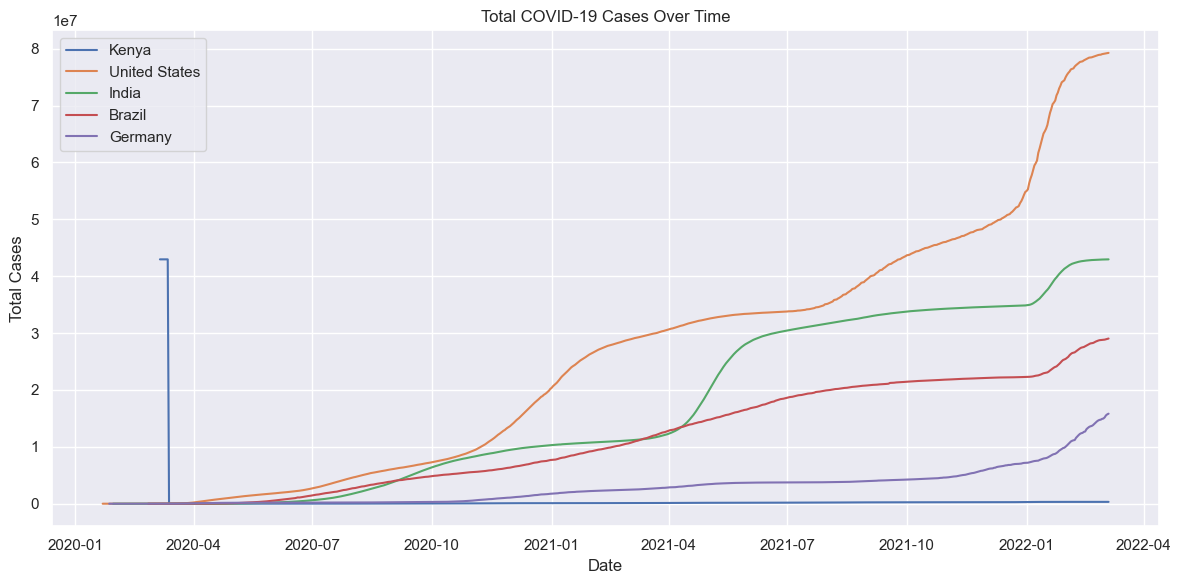

In [ ]:
# List of countries you want to analyze
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']

# Filter the dataset
df_countries = df[df['location'].isin(countries)].copy()

# Preview
df_countries.head()
df_countries['date'] = pd.to_datetime(df_countries['date'])
# Check how many missing values per column
missing = df_countries.isnull().sum().sort_values(ascending=False)
print(missing.head(10))

# Fill or drop as needed (example: forward fill)
df_countries.fillna(method='ffill', inplace=True)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\sally\AppData\Local\Temp\ipykernel_20556\2726822800.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


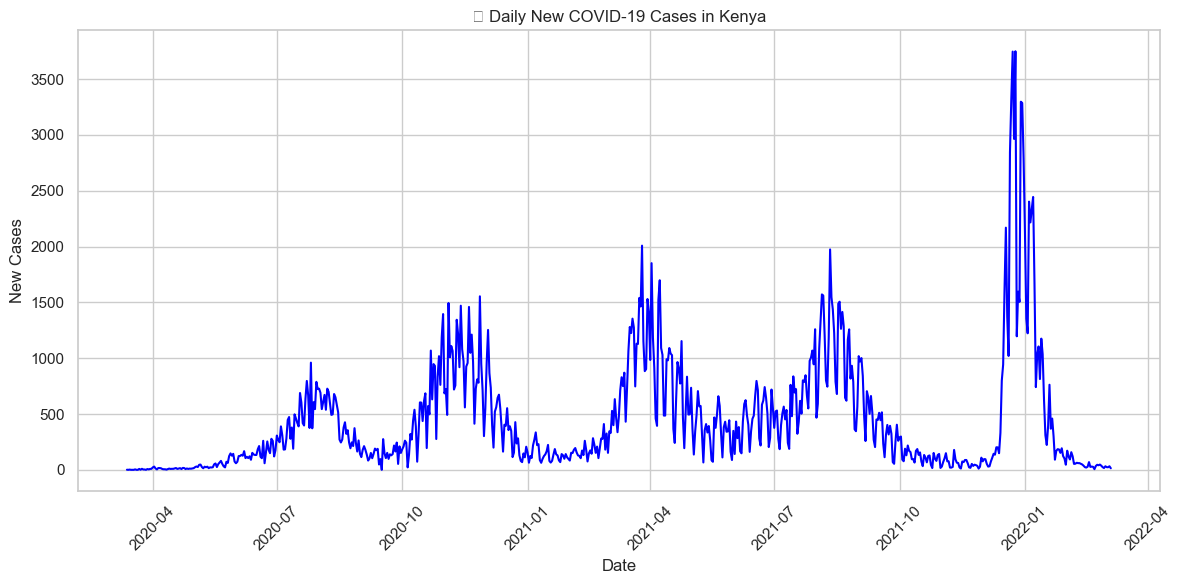

C:\Users\sally\AppData\Local\Temp\ipykernel_20556\2726822800.py:23: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


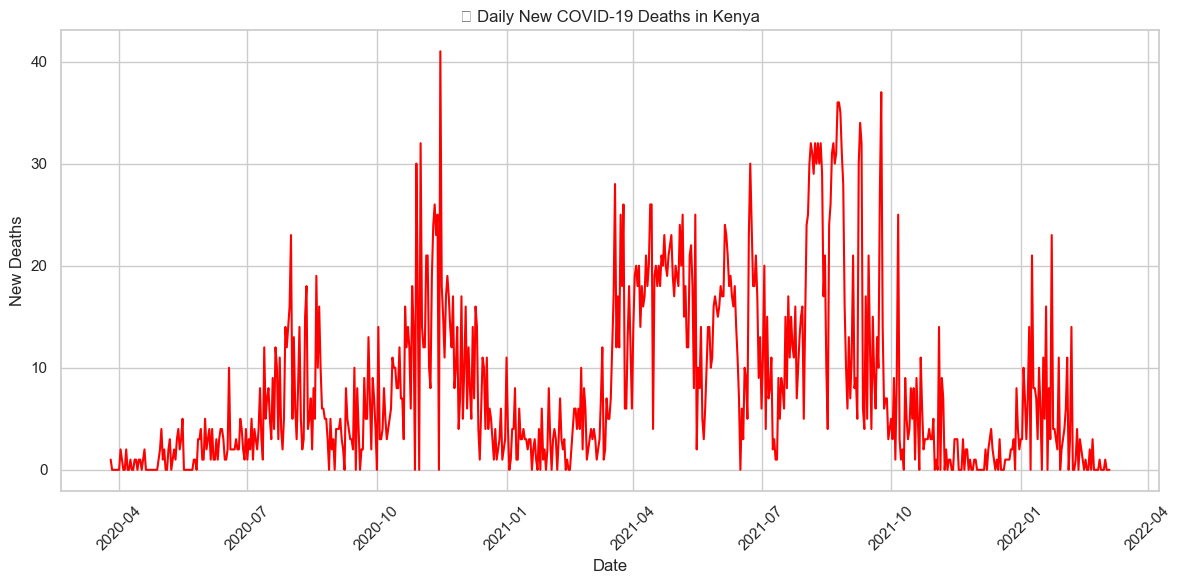

C:\Users\sally\AppData\Local\Temp\ipykernel_20556\2726822800.py:31: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


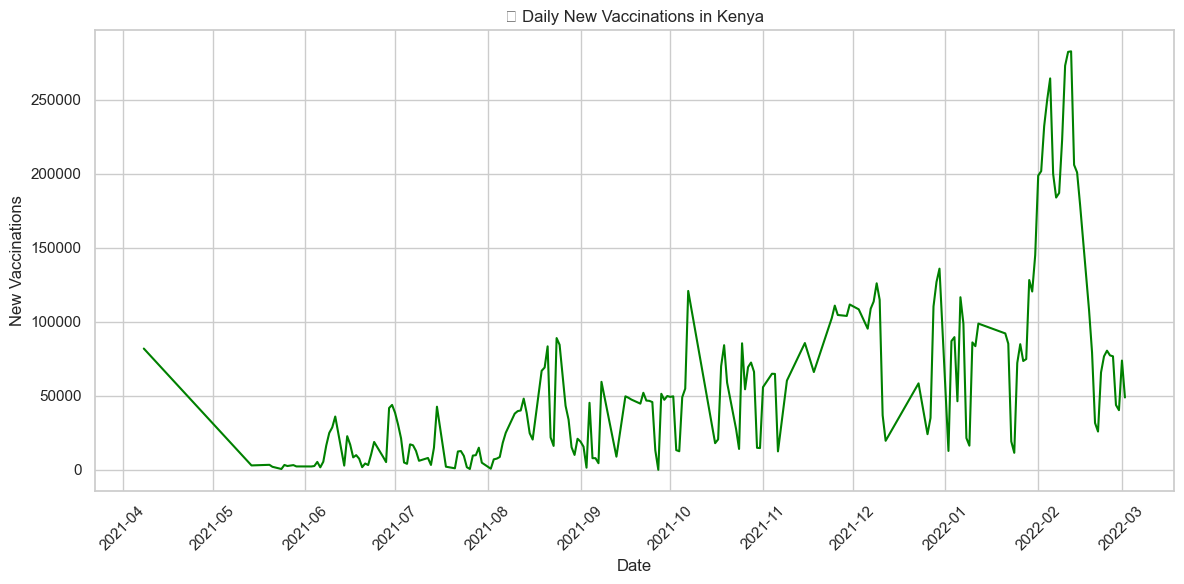

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")
df['date'] = pd.to_datetime(df['date'])
country = "Kenya"
df_country = df[df['location'] == country]
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', data=df_country, color='blue')
plt.title(f"📊 Daily New COVID-19 Cases in {country}")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_deaths', data=df_country, color='red')
plt.title(f"💀 Daily New COVID-19 Deaths in {country}")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_vaccinations', data=df_country, color='green')
plt.title(f"💉 Daily New Vaccinations in {country}")
plt.xlabel("Date")
plt.ylabel("New Vaccinations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


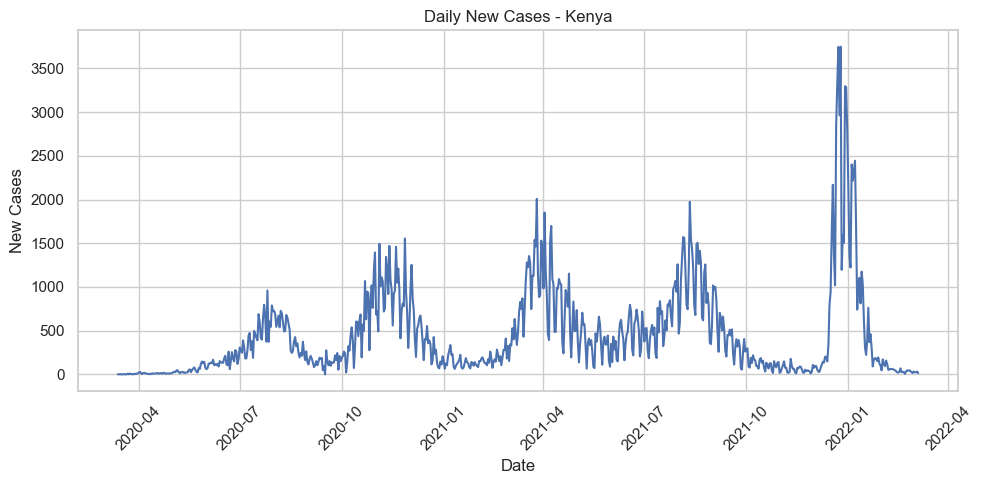

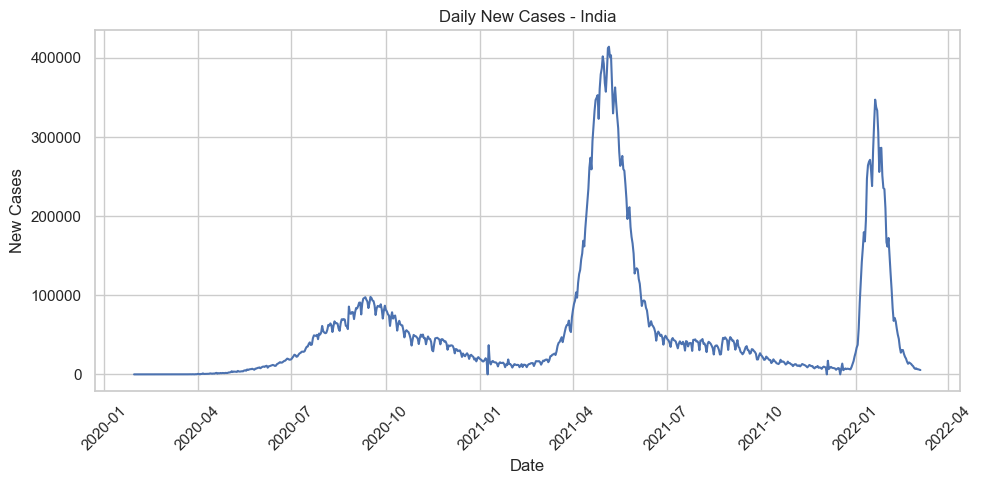

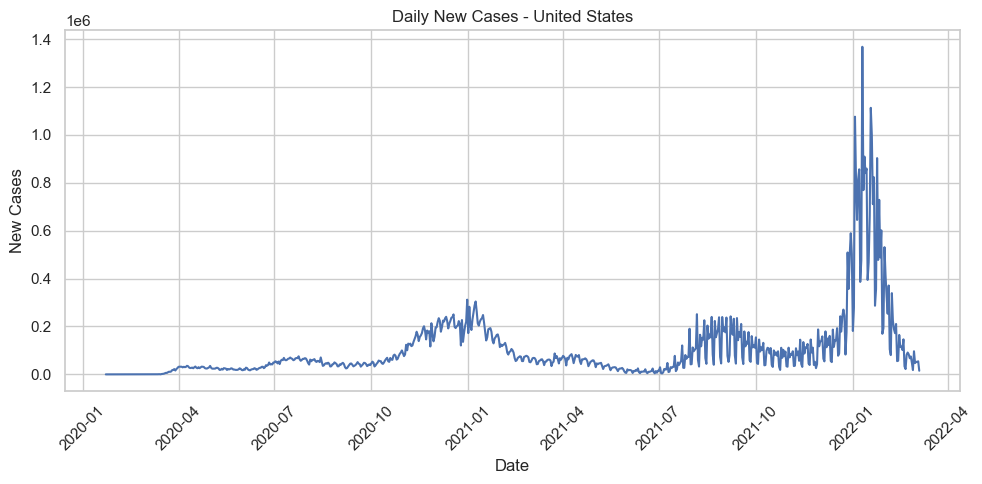

In [ ]:
for country in ["Kenya", "India", "United States"]:
    df_c = df[df['location'] == country]
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='date', y='new_cases', data=df_c)
    plt.title(f"Daily New Cases - {country}")
    plt.xlabel("Date")
    plt.ylabel("New Cases")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\sally\AppData\Local\Temp\ipykernel_20556\298498176.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


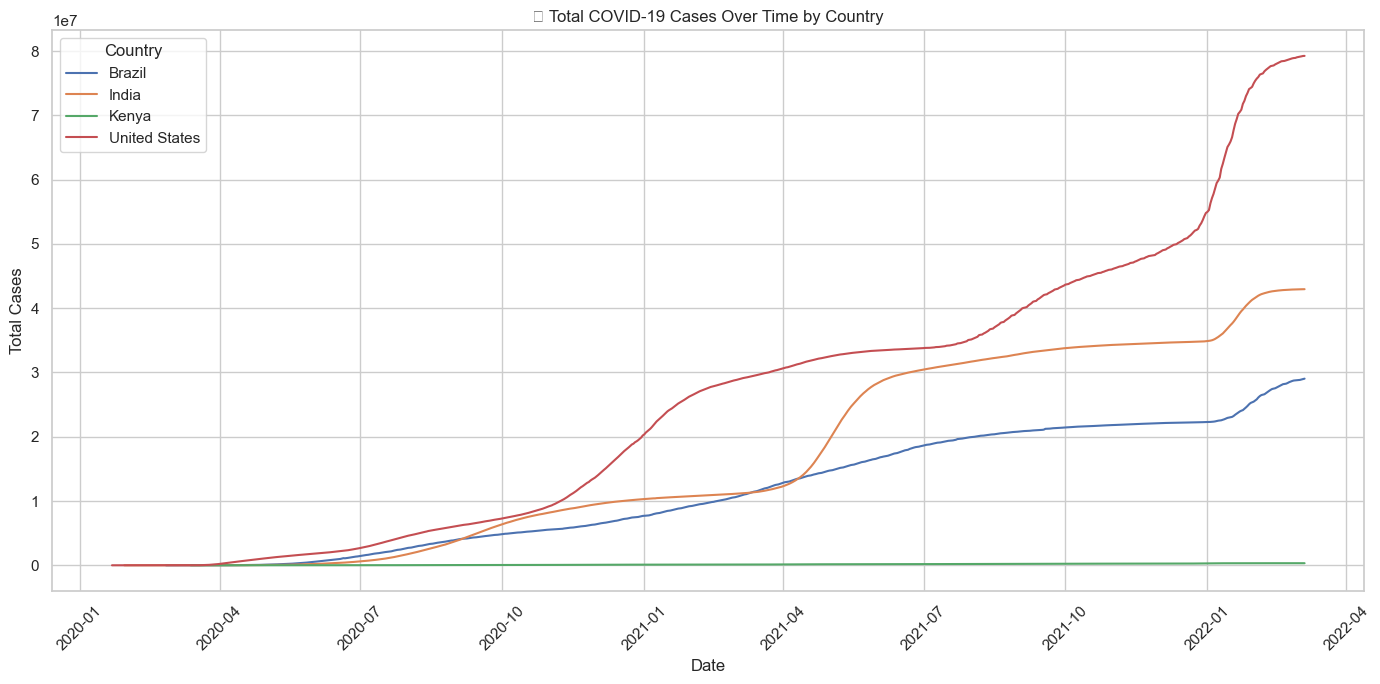

C:\Users\sally\AppData\Local\Temp\ipykernel_20556\298498176.py:19: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


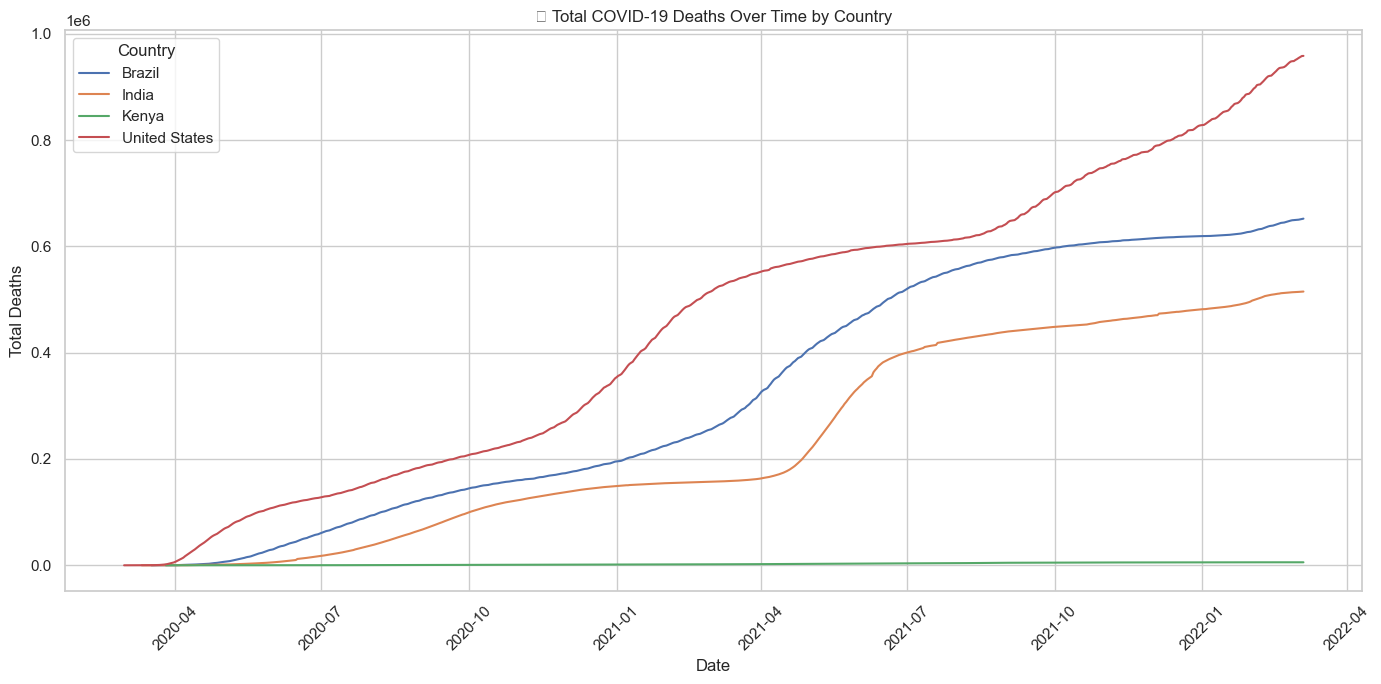

C:\Users\sally\AppData\Local\Temp\ipykernel_20556\298498176.py:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


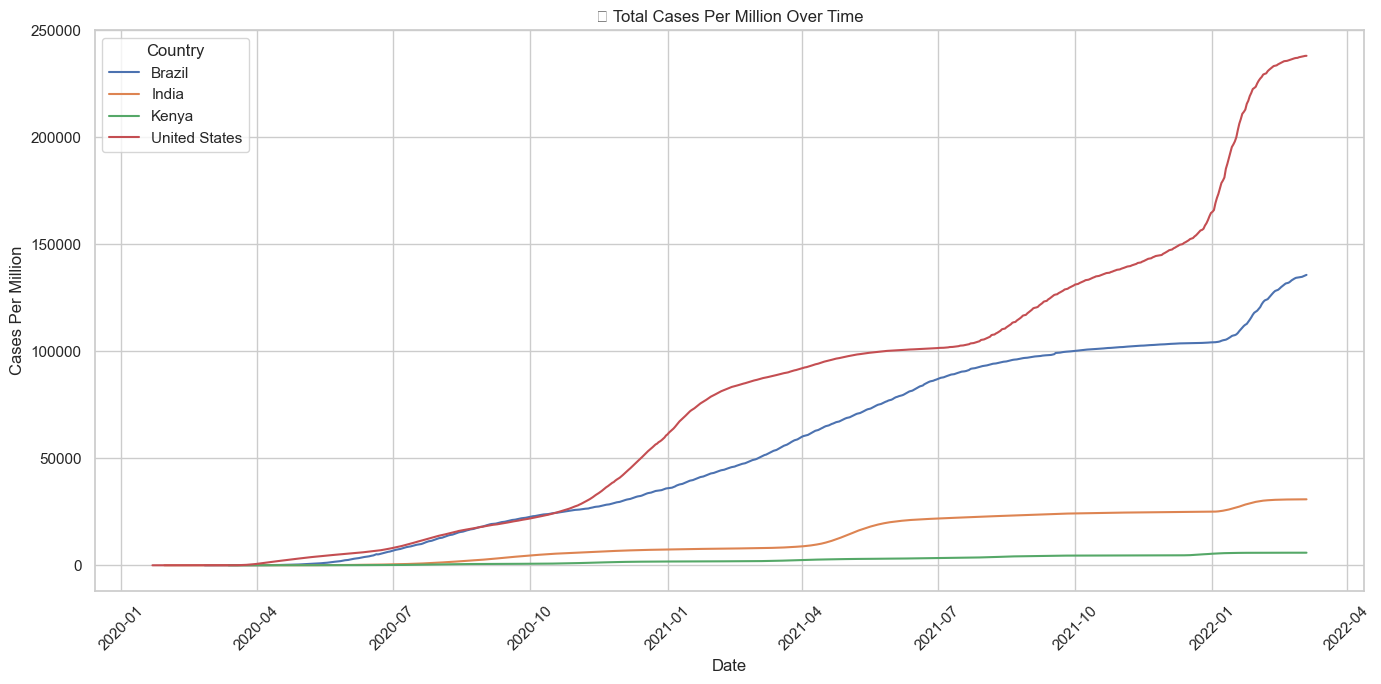

In [ ]:
countries = ['Kenya', 'India', 'United States', 'Brazil']
df_countries = df[df['location'].isin(countries)]
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_countries, x='date', y='total_cases', hue='location')
plt.title("📊 Total COVID-19 Cases Over Time by Country")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_countries, x='date', y='total_deaths', hue='location')
plt.title("💀 Total COVID-19 Deaths Over Time by Country")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(title="Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_countries, x='date', y='total_cases_per_million', hue='location')
plt.title("📈 Total Cases Per Million Over Time")
plt.xlabel("Date")
plt.ylabel("Cases Per Million")
plt.legend(title="Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\sally\AppData\Local\Temp\ipykernel_20556\1898178290.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


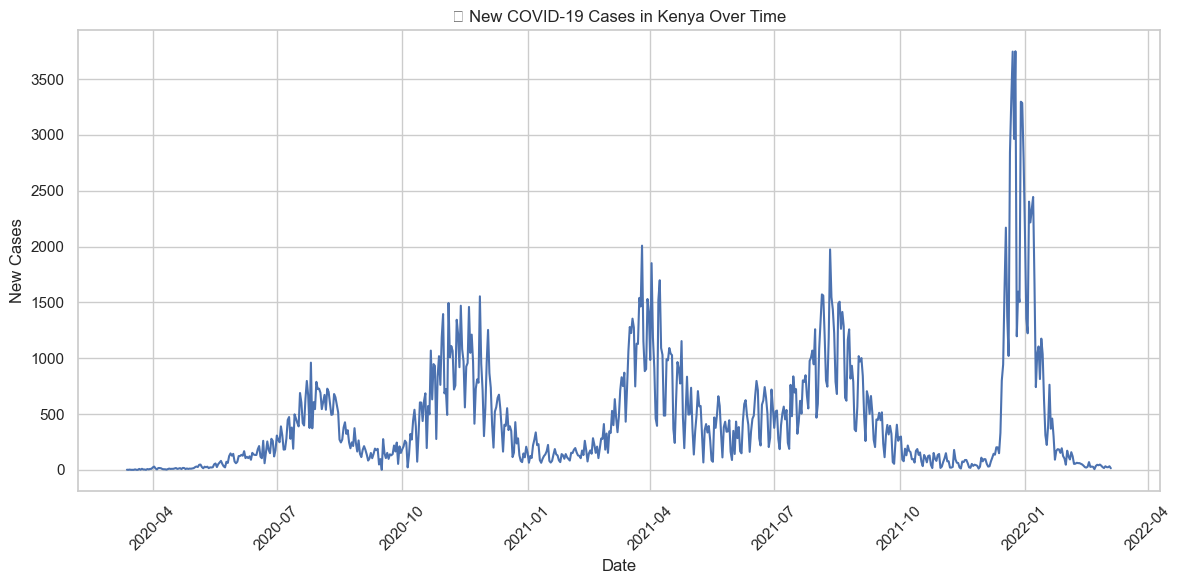

C:\Users\sally\AppData\Local\Temp\ipykernel_20556\1898178290.py:16: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


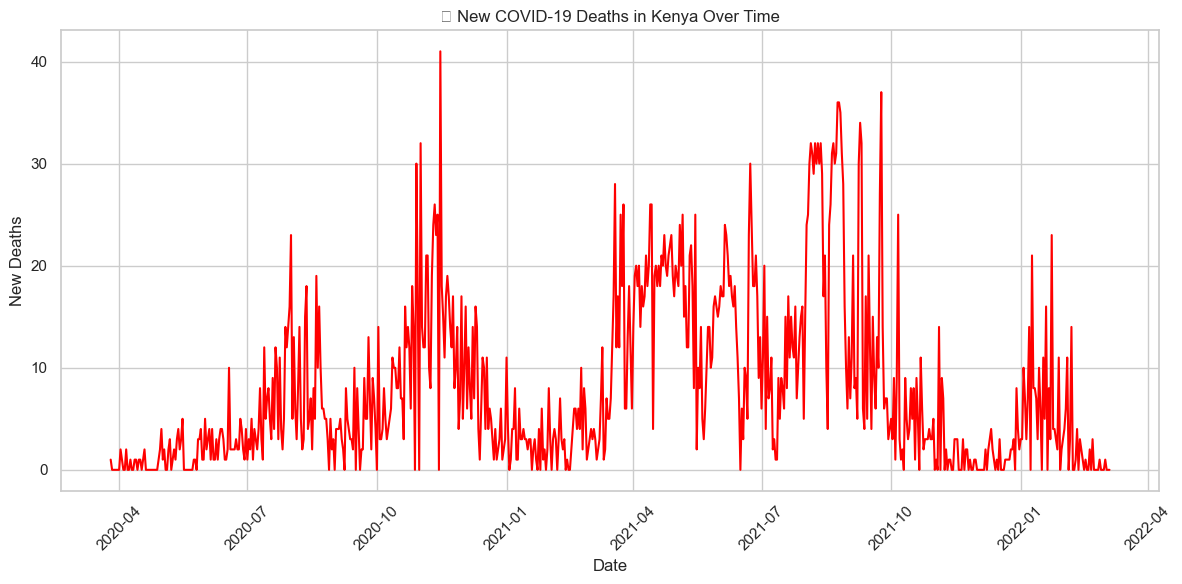

C:\Users\sally\AppData\Local\Temp\ipykernel_20556\1898178290.py:24: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


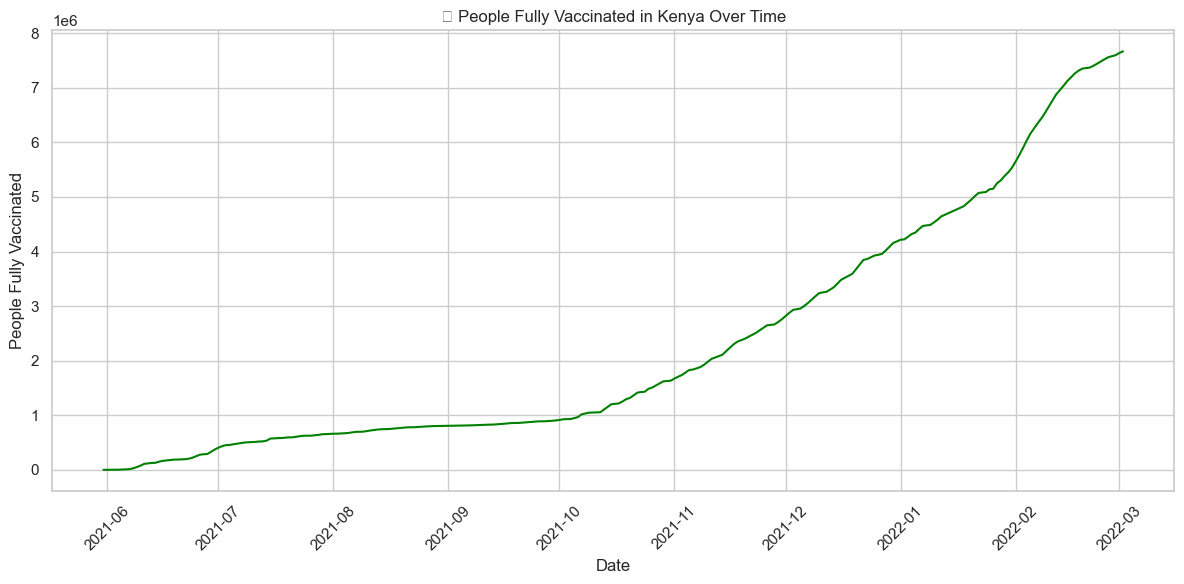

C:\Users\sally\AppData\Local\Temp\ipykernel_20556\1898178290.py:32: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


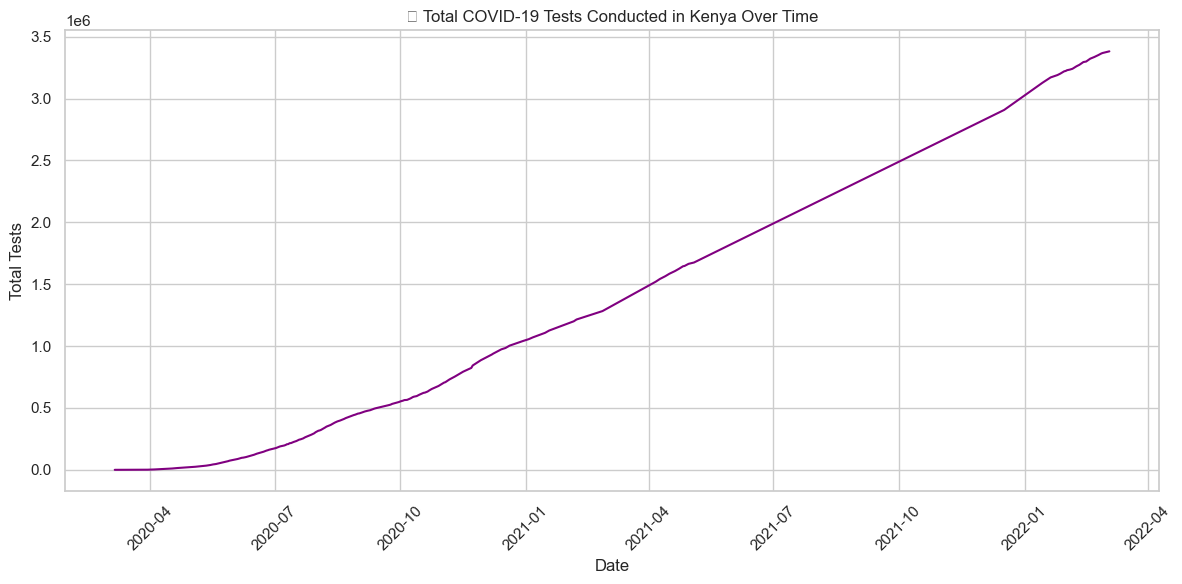

In [ ]:
kenya_df = df[df['location'] == 'Kenya']
plt.figure(figsize=(12, 6))
sns.lineplot(data=kenya_df, x='date', y='new_cases')
plt.title("📈 New COVID-19 Cases in Kenya Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(data=kenya_df, x='date', y='new_deaths', color='red')
plt.title("💀 New COVID-19 Deaths in Kenya Over Time")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(data=kenya_df, x='date', y='people_fully_vaccinated', color='green')
plt.title("💉 People Fully Vaccinated in Kenya Over Time")
plt.xlabel("Date")
plt.ylabel("People Fully Vaccinated")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(data=kenya_df, x='date', y='total_tests', color='purple')
plt.title("🧪 Total COVID-19 Tests Conducted in Kenya Over Time")
plt.xlabel("Date")
plt.ylabel("Total Tests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Columns available in dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_va

C:\Users\sally\AppData\Local\Temp\ipykernel_20556\1814766179.py:56: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sally\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


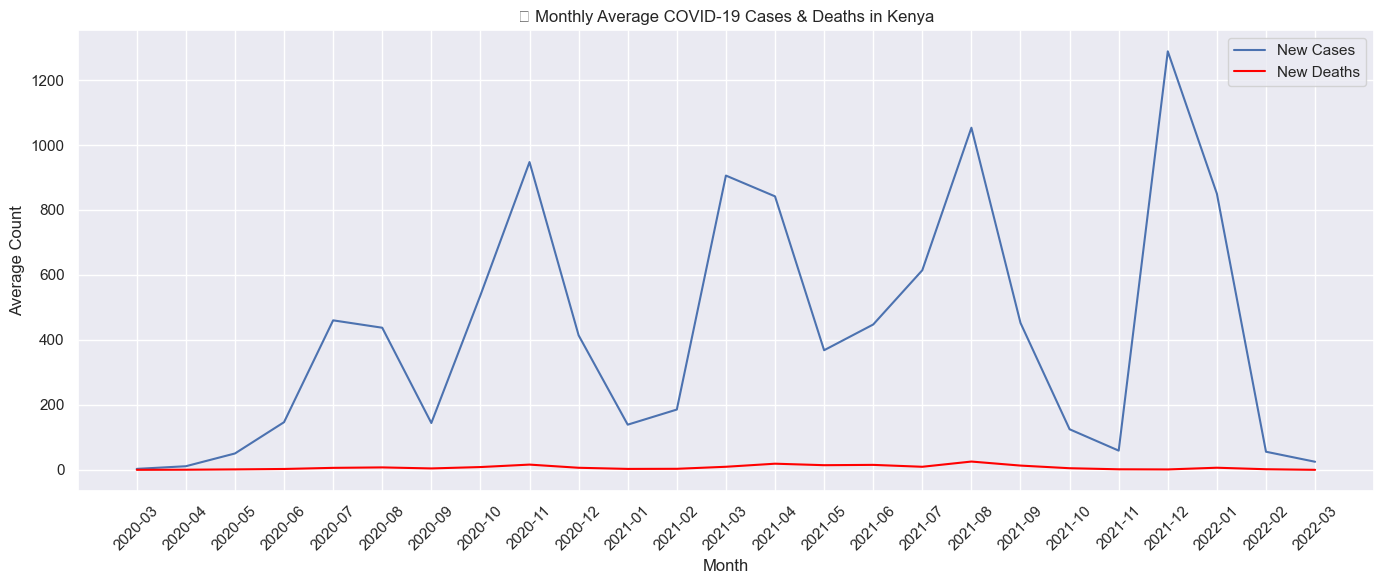

In [15]:
# 📘 COVID-19 Kenya Data Report

# 1️⃣ Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load data from Excel file
file_path = r"C:\Users\sally\Desktop\Covid19\owid-covid-data.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# 3️⃣ Explore columns and check for Kenya data
print("Columns available in dataset:")
print(df.columns.tolist())

# Filter for Kenya
kenya_df = df[df['location'] == 'Kenya'].copy()

# 4️⃣ Data cleaning
# Convert date to datetime
kenya_df['date'] = pd.to_datetime(kenya_df['date'])
# Create a month column for trend grouping
kenya_df['month'] = kenya_df['date'].dt.to_period('M')

# 5️⃣ Get latest totals for summary
latest = kenya_df.sort_values('date').dropna(subset=['total_cases', 'total_deaths', 'people_fully_vaccinated']).tail(1)
total_cases = int(latest['total_cases'].values[0])
total_deaths = int(latest['total_deaths'].values[0])
fully_vaccinated = int(latest['people_fully_vaccinated'].values[0])
population = int(latest['population'].values[0])

# 6️⃣ Print summary stats
print("\n📊 COVID-19 Summary for Kenya")
print("="*40)
print(f"🦠 Total Cases: {total_cases:,}")
print(f"💀 Total Deaths: {total_deaths:,}")
print(f"💉 Fully Vaccinated People: {fully_vaccinated:,}")
print(f"👥 Population: {population:,}")
print("="*40)

# 7️⃣ Monthly trend analysis
monthly_summary = kenya_df.groupby('month')[['new_cases', 'new_deaths']].mean().reset_index()

# 8️⃣ Plotting
plt.figure(figsize=(14, 6))
# Convert 'month' to string for plotting
monthly_summary_plot = monthly_summary.copy()
monthly_summary_plot['month'] = monthly_summary_plot['month'].astype(str)
sns.lineplot(data=monthly_summary_plot, x='month', y='new_cases', label='New Cases')
sns.lineplot(data=monthly_summary_plot, x='month', y='new_deaths', label='New Deaths', color='red')
plt.title("📉 Monthly Average COVID-19 Cases & Deaths in Kenya")
plt.xlabel("Month")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 9️⃣ Save cleaned data for reproducibility (optional)
kenya_df.to_csv("kenya_covid19_cleaned.csv", index=False)

# ✅ End of Notebook: Analysis complete!